In [351]:
from sklearn.datasets import make_classification
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [352]:
from sklearn.datasets import make_blobs
Input_data = make_blobs(n_samples=500, n_features=2, centers=2, cluster_std=1.1, 
                   center_box=(-5.0, 5.0), shuffle=False, random_state=1)
X = Input_data[0]
Y = Input_data[1]


In [353]:
X.shape

(500, 2)

In [354]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
data_frame = pd.DataFrame(X_scaled,columns=['x'+str(i) for i in range(1,3)])
data_frame['y'] = Y

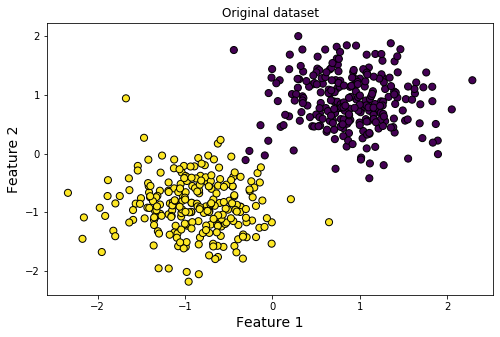

In [355]:
plt.figure(figsize=(8,5))    
plt.scatter(data_frame['x1'],data_frame['x2'],s=50,c=data_frame['y'], edgecolors='black')

plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.title("Original dataset")
plt.show()

In [356]:
Y.shape

(500,)

In [357]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

from rerf.urerf import UnsupervisedRandomForest

In [358]:
clf = UnsupervisedRandomForest(projection_matrix="RerF", random_state=0)

In [359]:
clf.fit(X_scaled)

UnsupervisedRandomForest(feature_combinations='auto', max_depth=None,
                         max_features='auto', min_samples_split='auto',
                         n_estimators=100, n_jobs=None,
                         projection_matrix='RerF', random_state=0)

In [360]:
sim_mat = clf.transform()
print(sim_mat)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [244]:
def symmetrize(graph, method="avg"):
    """
    A function for forcing symmetry upon a graph.
    Parameters
    ----------
    graph: object
        Either array-like, (n_vertices, n_vertices) numpy matrix,
        or an object of type networkx.Graph.
    method: {'avg' (default), 'triu', 'tril',}, optional
        An option indicating which half of the edges to
        retain when symmetrizing. 
            - 'avg'
                Retain the average weight between the upper and lower 
                right triangle, of the adjacency matrix.
            - 'triu'
                Retain the upper right triangle.
            - 'tril'
                Retain the lower left triangle.
            
    Returns
    -------
    graph: array-like, shape (n_vertices, n_vertices)
        the graph with asymmetries removed.
    Examples
    --------
    >>> a = np.array([
    ...    [0, 1, 1], 
    ...    [0, 0, 1], 
    ...    [0, 0, 1]])
    >>> symmetrize(a, method="triu")
    array([[0, 1, 1],
           [1, 0, 1],
           [1, 1, 1]])
    """
    # graph = import_graph(graph)
    if method == "triu":
        graph = np.triu(graph)
    elif method == "tril":
        graph = np.tril(graph)
    elif method == "avg":
        graph = (np.triu(graph) + np.tril(graph)) / 2
    else:
        msg = "You have not passed a valid parameter for the method."
        raise ValueError(msg)
    # A = A + A' - diag(A)
    graph = graph + graph.T - np.diag(np.diag(graph))
    return graph

In [361]:
new_sim = symmetrize(sim_mat)
print(new_sim)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


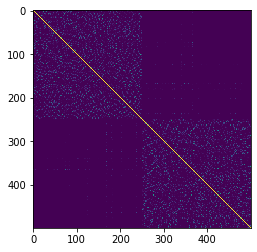

In [362]:
plt.imshow(sim_mat)

In [363]:
sym = (sim_mat + sim_mat.T)/2

In [364]:
sym - sym.T

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

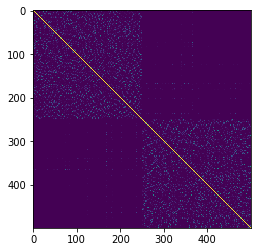

In [365]:
plt.imshow(sym)

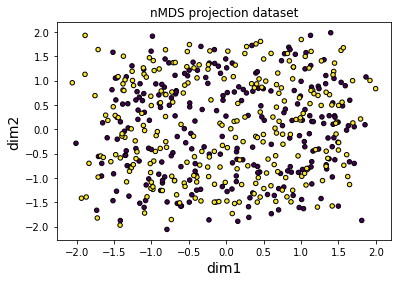

In [346]:
from sklearn.manifold import MDS

model = MDS(n_components=2, metric = False, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(sym)
out *= np.sqrt((X_scaled** 2).sum()) / np.sqrt((out ** 2).sum())
plt.scatter(out[:, 0], out[:, 1],s = 20, c=data_frame['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("nMDS projection dataset")
plt.show()



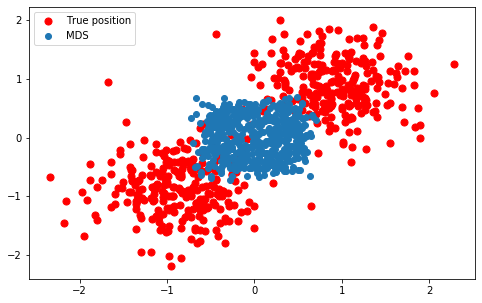

In [333]:
embedding = MDS(n_components=2, metric = False, dissimilarity='precomputed',random_state=1)

plt.figure(figsize=(8,5)) 
proj = embedding.fit_transform(sym)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=50)
plt.scatter(proj[:, 0], proj[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')


In [335]:
proj

array([[ 0.27028152, -0.41704382],
       [-0.28750743,  0.5072728 ],
       [ 0.50560498, -0.06127774],
       [ 0.14732517, -0.26872048],
       [ 0.50904995,  0.09712141],
       [ 0.11105713, -0.49499204],
       [ 0.31921235,  0.27969879],
       [ 0.13880441,  0.40626127],
       [-0.31463933,  0.18691518],
       [-0.42462766,  0.21136307],
       [-0.4869654 ,  0.18174602],
       [ 0.00377805, -0.44941182],
       [ 0.28877473, -0.30061799],
       [ 0.40190474, -0.39469184],
       [ 0.37005241,  0.43611141],
       [-0.15599366,  0.48427724],
       [ 0.40755709, -0.15716973],
       [-0.1461745 , -0.24776855],
       [ 0.4716587 , -0.28632615],
       [ 0.48282015, -0.21320536],
       [ 0.43223047,  0.3104233 ],
       [-0.41518357,  0.07133557],
       [ 0.21140734, -0.10882857],
       [-0.4246514 , -0.13913258],
       [ 0.24627099, -0.42852517],
       [-0.46271071,  0.18445367],
       [-0.01914288, -0.05161213],
       [-0.11332011,  0.14261051],
       [ 0.35833228,

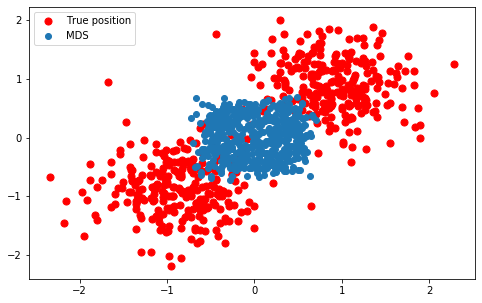

In [266]:
plt.figure(figsize=(8,5)) 
proj_1 = embedding.fit_transform(new_sim)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='r', s=50)
plt.scatter(proj_1[:, 0], proj_1[:, 1], cmap=plt.cm.get_cmap('jet', 10))
plt.legend(('True position','MDS'), loc='best')


In [339]:
proj_1

array([[ 0.27028152, -0.41704382],
       [-0.28750743,  0.5072728 ],
       [ 0.50560498, -0.06127774],
       [ 0.14732517, -0.26872048],
       [ 0.50904995,  0.09712141],
       [ 0.11105713, -0.49499204],
       [ 0.31921235,  0.27969879],
       [ 0.13880441,  0.40626127],
       [-0.31463933,  0.18691518],
       [-0.42462766,  0.21136307],
       [-0.4869654 ,  0.18174602],
       [ 0.00377805, -0.44941182],
       [ 0.28877473, -0.30061799],
       [ 0.40190474, -0.39469184],
       [ 0.37005241,  0.43611141],
       [-0.15599366,  0.48427724],
       [ 0.40755709, -0.15716973],
       [-0.1461745 , -0.24776855],
       [ 0.4716587 , -0.28632615],
       [ 0.48282015, -0.21320536],
       [ 0.43223047,  0.3104233 ],
       [-0.41518357,  0.07133557],
       [ 0.21140734, -0.10882857],
       [-0.4246514 , -0.13913258],
       [ 0.24627099, -0.42852517],
       [-0.46271071,  0.18445367],
       [-0.01914288, -0.05161213],
       [-0.11332011,  0.14261051],
       [ 0.35833228,

In [268]:
np.allclose(proj,proj_1)

True

In [270]:
np.allclose(proj, X_scaled)

False

In [272]:
cluster = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage="ward")
predict_labels = cluster.fit_predict(sim_mat)
score = adjusted_rand_score(Y, predict_labels)

print("labels\n", Y)
print("predict\n", predict_labels)
print("Adjusted Rand Score:", score)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [349]:
dis_mat = 1 - sim_mat

In [350]:
dis_mat

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [366]:
def isSymmetric(mat, N): 
    for i in range(N): 
        for j in range(N): 
            if (mat[i][j] != mat[j][i]): 
                return False
    return True

In [368]:
if (isSymmetric(dis_mat, 150)): 
    print ("Yes")
else: 
    print ("No")

No


In [369]:
new_diss= symmetrize(dis_mat)
if (isSymmetric(new_diss, 150)): 
    print ("Yes")
else: 
    print ("No")

Yes


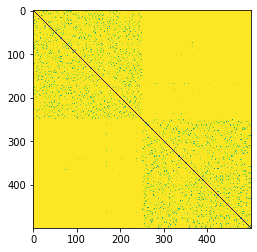

In [370]:
plt.imshow(new_diss)

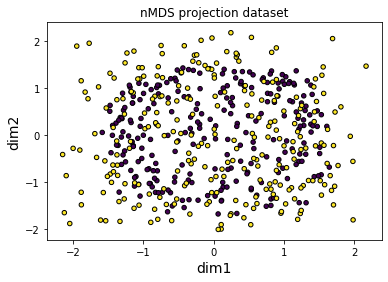

In [372]:
from sklearn.manifold import MDS

model = MDS(n_components=2, metric = False, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(new_diss)
out *= np.sqrt((X_scaled** 2).sum()) / np.sqrt((out ** 2).sum())
plt.scatter(out[:, 0], out[:, 1],s = 20, c=data_frame['y'], edgecolors='black')
plt.xlabel('dim1',fontsize=14)
plt.ylabel('dim2',fontsize=14)
plt.title("nMDS projection dataset")
plt.show()


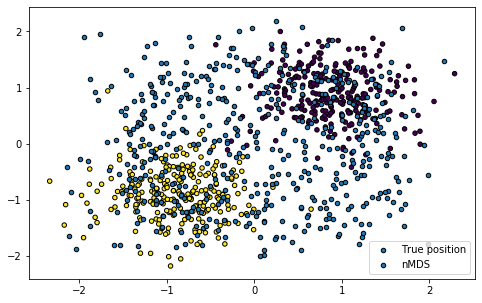

In [373]:
embedding2 = MDS(n_components=2, metric=False, max_iter=300, dissimilarity="precomputed", random_state=1)

plt.figure(figsize=(8,5)) 
proj2 = embedding2.fit_transform(new_diss)
proj2 *= np.sqrt((X_scaled** 2).sum()) / np.sqrt((proj2 ** 2).sum())
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], s = 20, c=data_frame['y'], edgecolors='black')
plt.scatter(proj2[:, 0], proj2[:, 1], s= 20, cmap=plt.cm.get_cmap('jet', 10),edgecolors='black')
plt.legend(('True position','nMDS'), loc='best')

In [338]:
proj2

array([[ 0.76914487, -1.18678892],
       [-0.81816493,  1.44355512],
       [ 1.43880895, -0.17437914],
       [ 0.41924582, -0.76470258],
       [ 1.44861237,  0.2763801 ],
       [ 0.31603721, -1.40860753],
       [ 0.90838818,  0.79594376],
       [ 0.39499814,  1.15610481],
       [-0.89537467,  0.53190782],
       [-1.2083704 ,  0.60147958],
       [-1.38576597,  0.51719783],
       [ 0.01075125, -1.27889911],
       [ 0.82177131, -0.85547388],
       [ 1.14370738, -1.12318151],
       [ 1.05306463,  1.2410499 ],
       [-0.4439139 ,  1.37811625],
       [ 1.15979237, -0.44726066],
       [-0.41597134, -0.70507931],
       [ 1.34220744, -0.81480335],
       [ 1.37396976, -0.60672224],
       [ 1.23000582,  0.88337703],
       [-1.18149518,  0.20300088],
       [ 0.60160558, -0.30969536],
       [-1.20843795, -0.39593202],
       [ 0.70081767, -1.21946159],
       [-1.316744  ,  0.52490305],
       [-0.05447522, -0.14687355],
       [-0.32247703,  0.40582923],
       [ 1.01971247,

In [323]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, predict_labels1)

0.488

In [377]:
import numpy as np
import pandas as pd
from scipy.spatial import distance_matrix

# Original code from OP, slightly reformatted
sample_df1 = pd.DataFrame(out,columns=['x'+str(i) for i in range(1,3)])

# Whole similarity algorithm in one line
df_euclid =(1 / (1 + distance_matrix(sample_df1, sample_df1)))

In [385]:
from scipy.spatial.distance import pdist,squareform
sample_df = pd.DataFrame(out,columns=['x'+str(i) for i in range(1,3)])
#sample_df.head()
p_dist = squareform(pdist(sample_df, metric='euclidean'))
#print(p_dist)
sim = 1 - p_dist
print(sim)

[[ 1.         -0.51536064 -0.73075376 ... -0.58124895  0.35371466
   0.17664304]
 [-0.51536064  1.          0.27190461 ... -2.01251961 -0.257752
  -0.74631335]
 [-0.73075376  0.27190461  1.         ... -2.31151295 -0.7335535
  -1.22406629]
 ...
 [-0.58124895 -2.01251961 -2.31151295 ...  1.         -0.79481987
  -0.3912876 ]
 [ 0.35371466 -0.257752   -0.7335535  ... -0.79481987  1.
   0.5039305 ]
 [ 0.17664304 -0.74631335 -1.22406629 ... -0.3912876   0.5039305
   1.        ]]


In [380]:
df_euclid

array([[1.        , 0.39755731, 0.36619926, ..., 0.38740936, 0.60742812,
        0.54843896],
       [0.39755731, 1.        , 0.57867176, ..., 0.24921997, 0.44291844,
        0.36412451],
       [0.36619926, 0.57867176, 1.        , ..., 0.23193714, 0.36582419,
        0.31016732],
       ...,
       [0.38740936, 0.24921997, 0.23193714, ..., 1.        , 0.35780481,
        0.41818475],
       [0.60742812, 0.44291844, 0.36582419, ..., 0.35780481, 1.        ,
        0.66841815],
       [0.54843896, 0.36412451, 0.31016732, ..., 0.41818475, 0.66841815,
        1.        ]])

In [378]:
df_euclid
if (isSymmetric(df_euclid, 150)): 
    print ("Yes")
else: 
    print ("No")

Yes


In [388]:
cluster2 = AgglomerativeClustering(n_clusters=2, affinity="precomputed", linkage="single")
predict_labels2 = cluster.fit_predict(df_euclid)
score2 = adjusted_rand_score(Y, predict_labels2)

print("labels\n", Y)
print("predict\n", predict_labels2)
print("Adjusted Rand Score:", score2)

labels
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 

In [390]:
ax = None
mse = (np.square(sim_mat - df_euclid)).mean(axis=ax)
print(mse)

0.16728899225001992


In [393]:
from sklearn.metrics.pairwise import euclidean_distances
eu_dist1 = euclidean_distances(sim_mat,sim_mat)
print(eu_dist1)
eu_dist2 = euclidean_distances(df_euclid,df_euclid)
print(eu_dist2)

[[0.         2.08004808 2.20056811 ... 2.15027905 2.42053713 2.29754217]
 [2.08004808 0.         2.0125854  ... 2.03835718 2.32142198 2.19314842]
 [2.20056811 2.0125854  0.         ... 2.17885291 2.44595585 2.32430635]
 ...
 [2.15027905 2.03835718 2.17885291 ... 0.         2.28834001 2.12320512]
 [2.42053713 2.32142198 2.44595585 ... 2.28834001 0.         2.44995918]
 [2.29754217 2.19314842 2.32430635 ... 2.12320512 2.44995918 0.        ]]
[[0.         4.27070488 4.78213585 ... 3.71469586 2.3052021  2.56201747]
 [4.27070488 0.         2.45341396 ... 5.04843353 3.85263688 4.44688483]
 [4.78213585 2.45341396 0.         ... 5.4189131  4.83650208 5.24090331]
 ...
 [3.71469586 5.04843353 5.4189131  ... 0.         4.08217789 3.22428433]
 [2.3052021  3.85263688 4.83650208 ... 4.08217789 0.         1.68456084]
 [2.56201747 4.44688483 5.24090331 ... 3.22428433 1.68456084 0.        ]]
